In [1]:
#Amy
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True) # this loads something called a Bunch
list(iris) # this lets us see what data elements are in the Bunch

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [2]:
#Amy
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Split data and train logistic regressor

In [3]:
#Amy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
#Amy
# Get independent and dependent variables
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

In [5]:
#Amy
#Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [6]:
#Amy
#Create logistic training model
model = LogisticRegression()
#train the model
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
#Amy
#make predictions on test
y_pred = model.predict(X_test)

In [8]:
#Amy
#evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

       False       0.95      1.00      0.98        21
        True       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[21  0]
 [ 1  8]]


In [9]:
#Amy
X_train.shape #Checking how many training samples we have

(120, 1)

Play with the regularization parameter
Look at the sklearn documentation if you need help here. You should change the regularization parameter, retrain, reassess

In [20]:
#Amy
#Trying different C's to see what happens
for C_val in [0.1, 1, 10]:
    model = LogisticRegression(C=C_val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'C={C_val} -> Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('-' * 50)


C=0.1 -> Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

       False       0.95      1.00      0.98        21
        True       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[21  0]
 [ 1  8]]
--------------------------------------------------
C=1 -> Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

       False       0.95      1.00      0.98        21
        True       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[21  0]
 [ 1  8]]
--------------------------------------------------
C=10 -> Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

       False       0.95      1.00      0

How C affect's decision boundaries

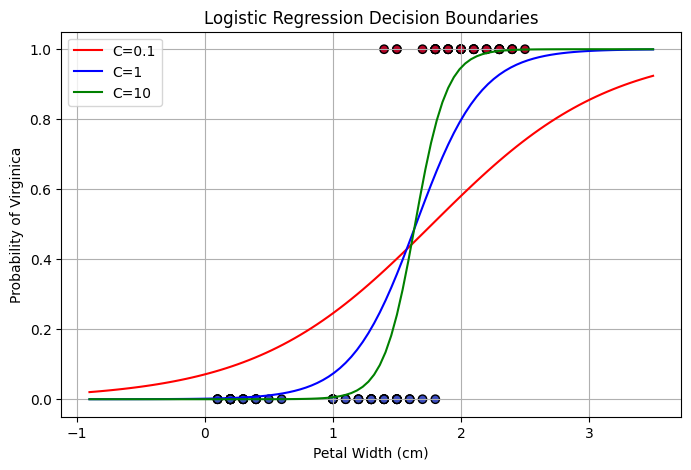

In [21]:
#Amy
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot

# Create a grid of points
x_min, x_max = X_train.min() - 1, X_train.max() + 1
x_values = np.linspace(x_min, x_max, 100).reshape(-1, 1)

plt.figure(figsize=(8, 5))

for C, color in zip([0.1, 1, 10], ['red', 'blue', 'green']):  #With different C values
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)

    # Predict probabilities across the grid
    y_prob = model.predict_proba(x_values)[:, 1]  # Probability of "Virginica"

    # Plot decision boundary where probability = 0.5
    plt.plot(x_values, y_prob, label=f'C={C}', color=color)

# Plot actual data
plt.scatter(X_train, y_train, c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability of Virginica")
plt.title("Logistic Regression Decision Boundaries")
plt.legend()
plt.grid(True)
plt.show()


Changing parameters

In [22]:
#Amy
#Trying different C's to see what happens, orginally just did 1 and 10 but no results so I went extreme
for C_val in [0.0001, 0.01, 0.1]:
    model = LogisticRegression(C=C_val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'C={C_val} -> Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('-' * 50)


C=0.0001 -> Accuracy: 0.7
              precision    recall  f1-score   support

       False       0.70      1.00      0.82        21
        True       0.00      0.00      0.00         9

    accuracy                           0.70        30
   macro avg       0.35      0.50      0.41        30
weighted avg       0.49      0.70      0.58        30

[[21  0]
 [ 9  0]]
--------------------------------------------------
C=0.01 -> Accuracy: 0.7
              precision    recall  f1-score   support

       False       0.70      1.00      0.82        21
        True       0.00      0.00      0.00         9

    accuracy                           0.70        30
   macro avg       0.35      0.50      0.41        30
weighted avg       0.49      0.70      0.58        30

[[21  0]
 [ 9  0]]
--------------------------------------------------
C=0.1 -> Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

       False       0.95      1.00      0.98        21
        T

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

New parameters decison boundaries

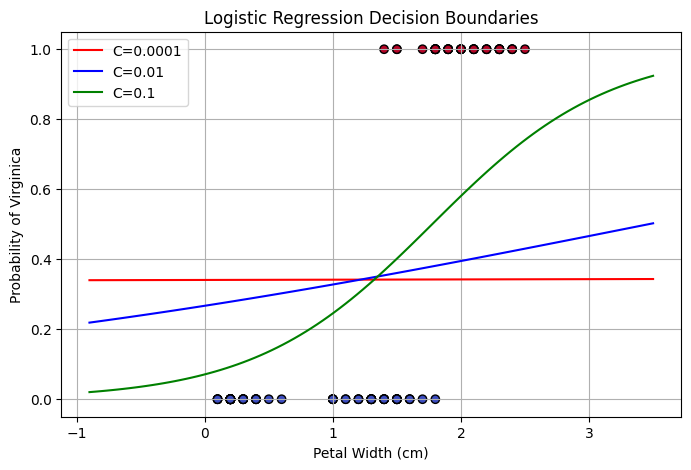

In [23]:
#Amy
import numpy as np

# Create a grid of points
x_min, x_max = X_train.min() - 1, X_train.max() + 1
x_values = np.linspace(x_min, x_max, 100).reshape(-1, 1)

plt.figure(figsize=(8, 5))

for C, color in zip([0.0001, 0.01, 0.1], ['red', 'blue', 'green']):
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)

    # Predict probabilities across the grid
    y_prob = model.predict_proba(x_values)[:, 1]  # Probability of "Virginica"

    # Plot decision boundary where probability = 0.5
    plt.plot(x_values, y_prob, label=f'C={C}', color=color)

# Plot actual data
plt.scatter(X_train, y_train, c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability of Virginica")
plt.title("Logistic Regression Decision Boundaries")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
#Amy
#Trying different C's to see what happens, orginally just did 1 and 10 but no results so I went extreme
for C_val in [1, 10, 1000]:
    model = LogisticRegression(C=C_val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'C={C_val} -> Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('-' * 50)

C=1 -> Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

       False       0.95      1.00      0.98        21
        True       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[21  0]
 [ 1  8]]
--------------------------------------------------
C=10 -> Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

       False       0.95      1.00      0.98        21
        True       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[21  0]
 [ 1  8]]
--------------------------------------------------
C=1000 -> Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

       False       0.95      1.00      

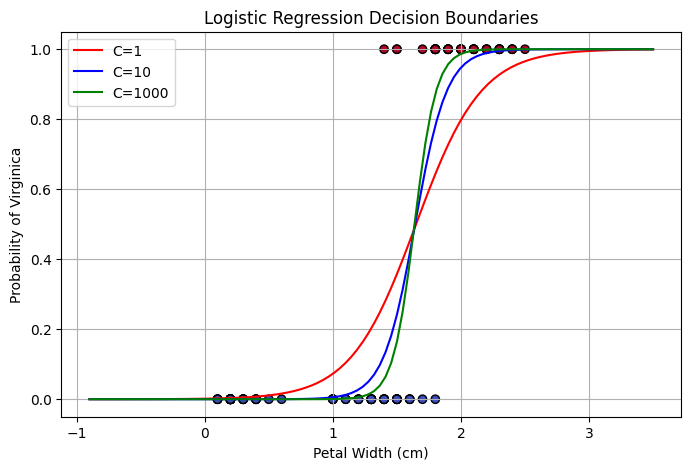

In [25]:
#Amy
import numpy as np

# Create a grid of points
x_min, x_max = X_train.min() - 1, X_train.max() + 1
x_values = np.linspace(x_min, x_max, 100).reshape(-1, 1)

plt.figure(figsize=(8, 5))

for C, color in zip([1, 10, 1000], ['red', 'blue', 'green']):
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)

    # Predict probabilities across the grid
    y_prob = model.predict_proba(x_values)[:, 1]  # Probability of "Virginica"

    # Plot decision boundary where probability = 0.5
    plt.plot(x_values, y_prob, label=f'C={C}', color=color)

# Plot actual data
plt.scatter(X_train, y_train, c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability of Virginica")
plt.title("Logistic Regression Decision Boundaries")
plt.legend()
plt.grid(True)
plt.show()

Visualize how accuracy changes as we adjust C

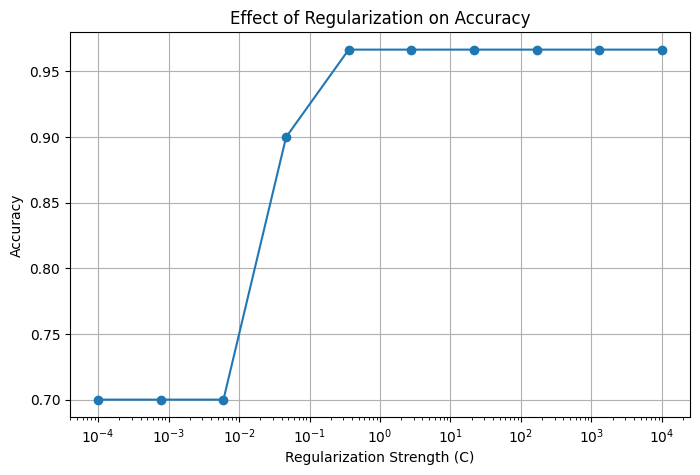

In [17]:
#Amy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Different C values to test
C_values = np.logspace(-4, 4, 10)  # 10 values from 0.0001 to 10,000
accuracies = []

for C in C_values:
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(C_values, accuracies, marker='o', linestyle='-')
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Accuracy")
plt.title("Effect of Regularization on Accuracy")
plt.grid(True)
plt.show()
